In [6]:
# Data for matrix multiplication implementation comparison
# Serial implementation time for each input size
serial_times = [0.420864796, 1.619606388, 4.536148336]

# Pthreads implementation times for each thread count and input size
pthread_times = np.array([
    # N=500
    [0.425812889, 0.216316432, 0.156348972, 0.183419344, 
     0.158945878, 0.165514274, 0.154415917, 0.146847066],
    # N=750
    [1.644688598, 0.868973405, 0.603204520, 0.519311577, 
     0.677314163, 0.709408194, 0.647864844, 0.670856288],
    # N=1000
    [4.105306853, 2.459468004, 1.904393067, 1.563117130, 
     1.869519435, 1.885845326, 1.974891367, 2.056653344]
])

# OpenMP implementation times for each thread count and input size
openmp_times = np.array([
    # N=500
    [0.457904452, 0.236221075, 0.170859526, 0.141926115, 
     0.163771009, 0.158302692, 0.152566037, 0.238373754],
    # N=750
    [1.756549556, 0.923519636, 0.750369786, 0.642791219, 
     0.740635424, 0.707232196, 0.685431203, 1.033728769],
    # N=1000
    [4.650216546, 2.669773275, 2.006859969, 1.680850556, 
     1.858096504, 1.909563438, 1.959085392, 2.970247081]
])

# Input sizes
n_values = [500, 750, 1000]

# Thread counts
thread_counts = [1, 2, 3, 4, 5, 6, 7, 8]

# Calculate the matrix size for each input value
matrix_sizes = [n**2 for n in n_values]

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def plot_speedup(serial_times, pthread_times, openmp_times, thread_counts, n_values):
    num_sizes = len(n_values)
    num_threads = len(thread_counts)

    # Define colors for each input size
    colors = ['red', 'blue', 'green']

    # Initialize arrays to hold speedup values
    pthread_speedup = np.zeros((num_sizes, num_threads))
    openmp_speedup = np.zeros((num_sizes, num_threads))

    # Calculate speedup for each input size and thread count
    for i, n in enumerate(n_values):
        for j, t in enumerate(thread_counts):
            pthread_speedup[i][j] = serial_times[i] / pthread_times[i][j]
            openmp_speedup[i][j] = serial_times[i] / openmp_times[i][j]

    # Plot the results
    plt.figure(figsize=(12, 6))

    # Plot pthread speedup
    for i, n in enumerate(n_values):
        plt.plot(thread_counts, pthread_speedup[i], label=f"pthread N={n}", color=colors[i], linestyle='--', marker='o')

    # Plot OpenMP speedup
    for i, n in enumerate(n_values):
        plt.plot(thread_counts, openmp_speedup[i], label=f"OpenMP N={n}", color=colors[i], linestyle='--', marker='x')

    # Plot serial time as a reference line
    plt.plot(thread_counts, [1] * num_threads, label='Serial', linestyle='--')

    plt.title("Speedup vs. Number of Threads")
    plt.xlabel("Number of Threads")
    plt.ylabel("Speedup")
    plt.xticks(thread_counts)
    plt.legend()
    plt.show()

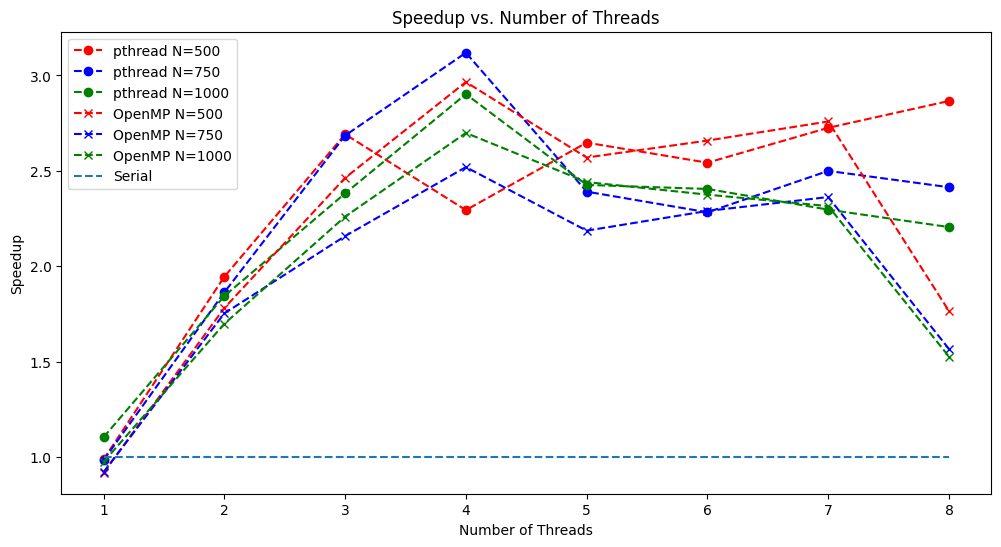

In [21]:
plot_speedup(serial_times, pthread_times, openmp_times, thread_counts, n_values)

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def plot_execution_time(serial_times, pthread_times, openmp_times, thread_counts, n_values):
    num_sizes = len(n_values)
    num_threads = len(thread_counts)

    # Initialize arrays to hold execution time values
    pthread_exec_time = np.zeros((num_sizes, num_threads))
    openmp_exec_time = np.zeros((num_sizes, num_threads))

    # Calculate execution time for each input size and thread count
    for i, n in enumerate(n_values):
        for j, t in enumerate(thread_counts):
            pthread_exec_time[i][j] = pthread_times[i][j]
            openmp_exec_time[i][j] = openmp_times[i][j]

    # Plot the results
    plt.figure(figsize=(12, 6))

    # Plot pthread execution time
    for i, n in enumerate(n_values):
        color = plt.cm.tab10(i/num_sizes)
        plt.plot(thread_counts, pthread_exec_time[i], label=f"pthread N={n}", linestyle='--', marker='o', color=color)

    # Plot OpenMP execution time
    for i, n in enumerate(n_values):
        color = plt.cm.tab10(i/num_sizes)
        plt.plot(thread_counts, openmp_exec_time[i], label=f"OpenMP N={n}", linestyle='--', marker='x', color=color)

    # Plot serial time as a reference line
    for i, n in enumerate(n_values):
        color = plt.cm.tab10(i/num_sizes)
        plt.plot(thread_counts, [serial_times[i]] * num_threads, label=f"Serial N={n}", linestyle='--', color=color)

    plt.title("Execution Time vs. Number of Threads")
    plt.xlabel("Number of Threads")
    plt.ylabel("Execution Time (seconds)")
    plt.xticks(thread_counts)
    plt.legend()
    plt.show()


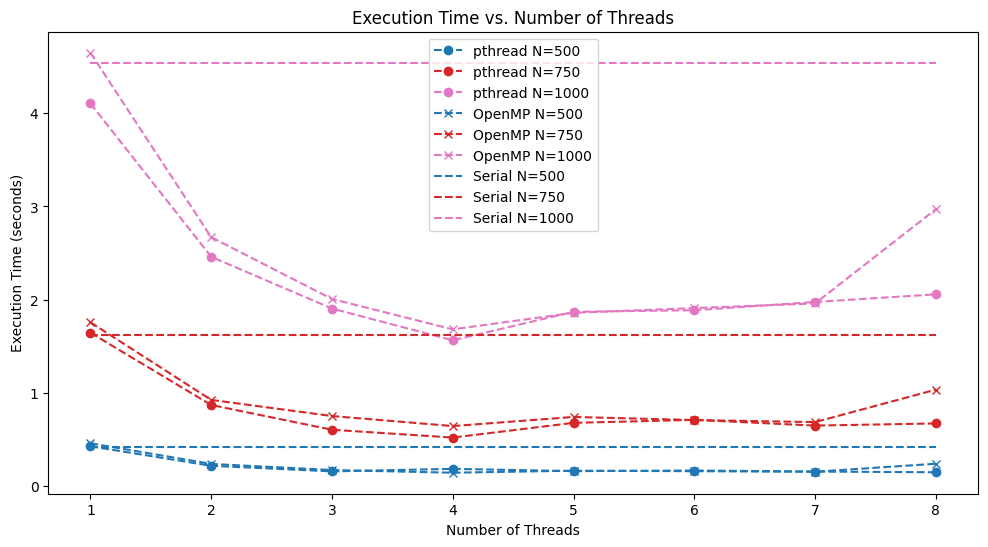

In [27]:
plot_execution_time(serial_times, pthread_times, openmp_times, thread_counts, n_values)

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def plot_efficiency(serial_times, pthread_times, openmp_times, thread_counts, n_values):
    num_sizes = len(n_values)
    num_threads = len(thread_counts)

    # Initialize arrays to hold efficiency values
    pthread_efficiency = np.zeros((num_sizes, num_threads))
    openmp_efficiency = np.zeros((num_sizes, num_threads))

    # Calculate efficiency for each input size and thread count
    for i, n in enumerate(n_values):
        for j, t in enumerate(thread_counts):
            pthread_efficiency[i][j] = serial_times[i] / (pthread_times[i][j] * t)
            openmp_efficiency[i][j] = serial_times[i] / (openmp_times[i][j] * t)

    # Plot the results
    plt.figure(figsize=(12, 6))

    # Plot pthread efficiency
    for i, n in enumerate(n_values):
        plt.plot(thread_counts, pthread_efficiency[i], label=f"pthread N={n}", linestyle='--', marker='o')

    # Plot OpenMP efficiency
    for i, n in enumerate(n_values):
        plt.plot(thread_counts, openmp_efficiency[i], label=f"OpenMP N={n}", linestyle='--', marker='x')

    plt.title("Efficiency vs. Number of Threads")
    plt.xlabel("Number of Threads")
    plt.ylabel("Efficiency")
    plt.xticks(thread_counts)
    plt.legend()
    plt.show()


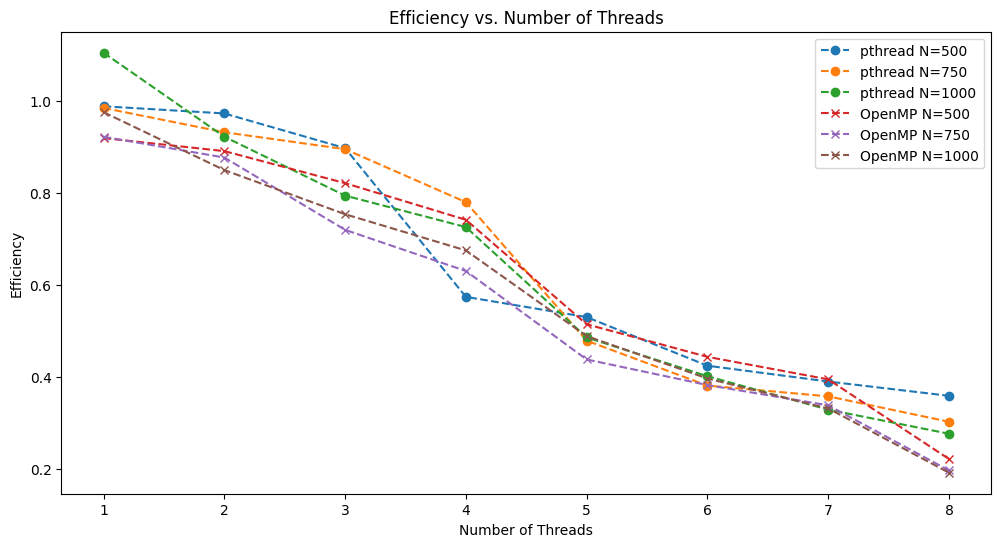

In [29]:
plot_efficiency(serial_times, pthread_times, openmp_times, thread_counts, n_values)